In [99]:
import cv2
import numpy as np
from commonfunctions import *
import imutils

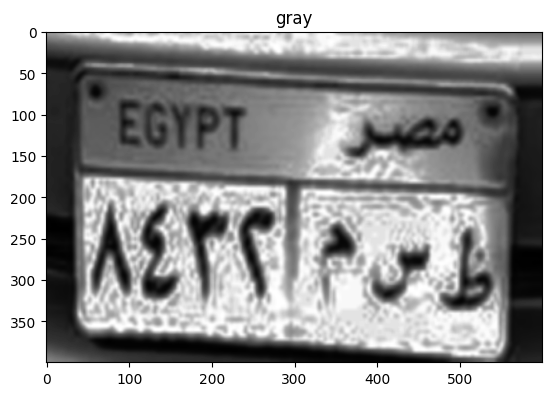

In [113]:
img = cv2.imread('Results/0005.jpg', cv2.IMREAD_COLOR)
img = cv2.resize(img, (600, 400))
#contrast enhancement
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)
gray = cv2.GaussianBlur(gray, (5, 5), 10)
show_images([gray], ['gray'])


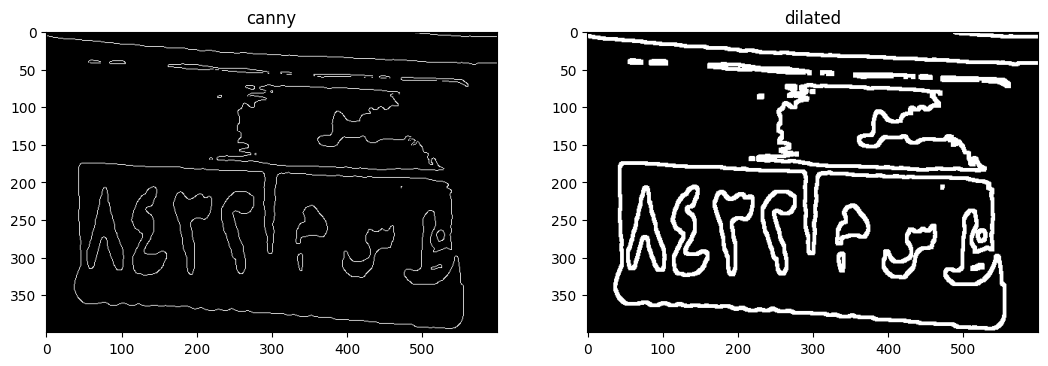

In [115]:
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
canny = cv2.Canny(thresh, 30, 150)
eroded = cv2.erode(canny, None, iterations=1)
dilated = cv2.dilate(canny, None, iterations=2)
show_images([canny,dilated], ['canny',"dilated"])

In [102]:
def merge_vertical_rectangles(rectangles):
    merged_rectangles = rectangles.copy()
    for i in range(len(rectangles)):
            if merged_rectangles[i] is not None:
                #get centers
                # find if there is a rectangle just under it
                for j in range(i+1,len(rectangles)):
                    x1,y1,w1,h1 = merged_rectangles[i]
                    if merged_rectangles[j] is not None:
                        x2,y2,w2,h2 = merged_rectangles[j]
                        # get a larger rectangle that contains both
                        if (x1 <= x2 and x1+w1 >= x2) or (x1 >= x2 and x1 <= x2+w2):
                        
                            # merge the two rectangles
                            x1_new = min(x1,x2)
                            y1_new = min(y1,y2)
                            x2_new = max(x1+w1,x2+w2)
                            y2_new = max(y1+h1,y2+h2)
                            w_new = x2_new-x1_new
                            h_new = y2_new-y1_new
                            new_rect = (x1_new,y1_new,w_new,h_new)
                            new_aspect_ratio = w_new/h_new
                            if new_aspect_ratio < 0.6:
                                merged_rectangles[i] = new_rect
                                merged_rectangles[j] = None
    return merged_rectangles
    

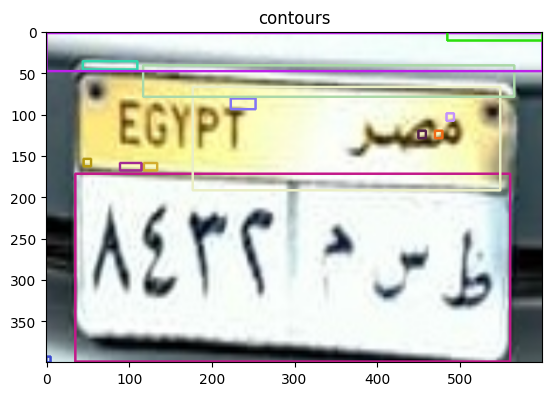

0.7142857142857143 35
2.317180616740088 119402
1.7777777777777777 144
0.5378787878787878 9372
1.0 81
1.0 81
1.0 81
1.0 81
2.3076923076923075 390
2.976 46500
11.81578947368421 17062
13.043478260869565 27600
10.454545454545455 1265


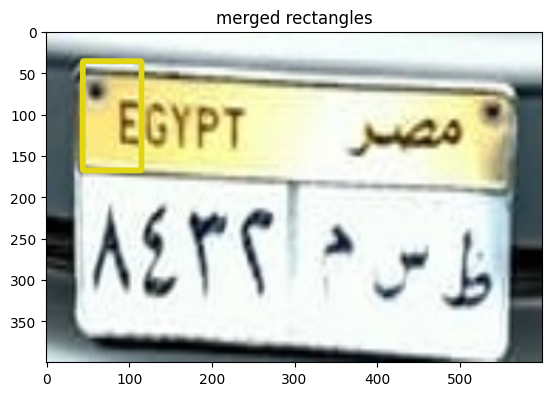

In [103]:
cnts = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
img_copy = img.copy()

for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    # random color
    color = np.random.randint(0, 255, size=(3,)).tolist()
    cv2.rectangle(img_copy, (x, y), (x + w, y + h), color, 2)
show_images([img_copy], ['contours'])
    
rectangles = []
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    rectangles.append((x,y,w,h))
rectangles = merge_vertical_rectangles(rectangles)

img_copy = img.copy()
for r in rectangles:
    if r is not None:
        (x, y, w, h) = r
        # random color
        aspect_ratio = w/h
        area = w*h
        print(aspect_ratio,area)
        if 0.1 < aspect_ratio < 0.6 and area < 20000:
            color = np.random.randint(0, 255, size=(3,)).tolist()
            cv2.rectangle(img_copy, (x, y), (x + w, y + h), color, 5)
show_images([img_copy], ['merged rectangles'])

In [104]:
from imutils.contours import sort_contours